# Simulation Evaluation
Following the [previous notebook](example_simulate-archive.ipynb), this notebook demonstrates:

1. creating simulatiions with different control strategies;
2. evaluating how the simulation does compared with the original data; and,
3. evaluating how different holding strategies affect the route performance

with the `simulator` module in the `buskit` package.

### List of available object logs generated throughout the simulation process

A. Stop

A.1  streaming

- log_bus_ref: reference of every vehicle that passed by/stopped at the stop
- log_arr_t: inferred arrival time of every vehicle that passed by/stopped at the stop
- log_dep_t: inferred departure time of every vehicle that passed by/stopped at the stop
- log_headway: calculated headway, chronological
- log_dwell_t: inferred dwell time, chronological
- log_q: calculated q parameter, chronological

A.2 simulation

- sim_arr_t: arrival time of every SimBus vehicle
- sim_dep_t: departure time of every SimBus vehicle
- sim_headway: headway between every SimBus vehicle

B. Link

- log_speed: every inferred speed from streaming, chronological

C. SimBus

- log_pos: vehicle location (distance along route) by second
- log_time: timestamp by second
- log_status: vehicle action by second
- log_speed: vehicle speed by second
- log_dwell: vehicle dwelling time, recorded once upon reaching a stop
- log_hold: vehicle holding time, recorded once upon reaching a stop
- log_stop: stop index, recorded once upon reaching a stop

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import buskit as bk
from buskit import busdata as bdata
from buskit import dashboard as bdash
from buskit import simulator as bsim

from IPython.display import display, clear_output

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# specify path to the archive AVL file
# archive_path = 'MTA_data/B46%2B-180716-171100-44650-Mon.csv'
# archive_path = 'MTA_data/B15-180705-145946-44650-Thu.csv'
archive_path = 'MTA_data/B15-180625-235941-44650-Mon.csv'

# specify direction and time
direction = 1
time = 180 # minutes

# Original trajectory

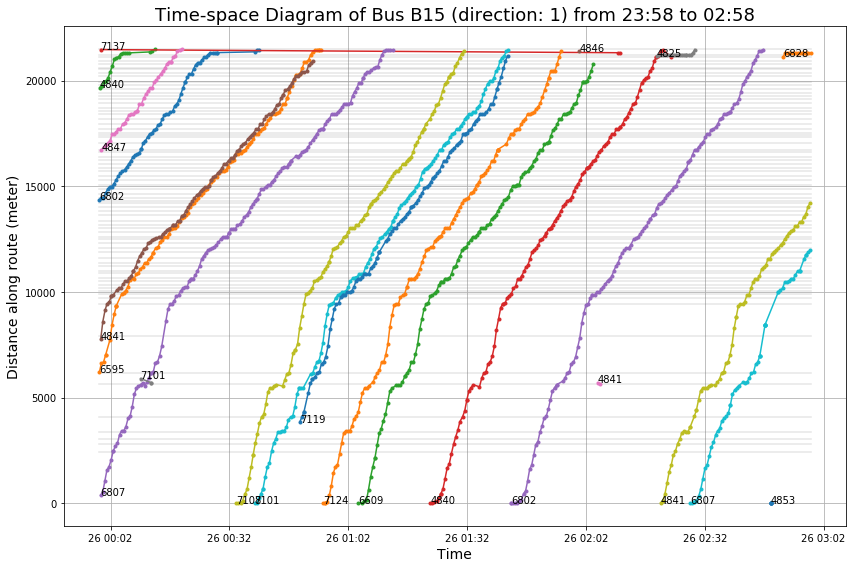

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x121d769e8>)

In [3]:
# plot TSD for cross-validation
df = pd.read_csv(archive_path)
df = bdata.split_trips(df)
bdata.plot_tsd(df, direction, 0, time)

# 0. Simulation without control

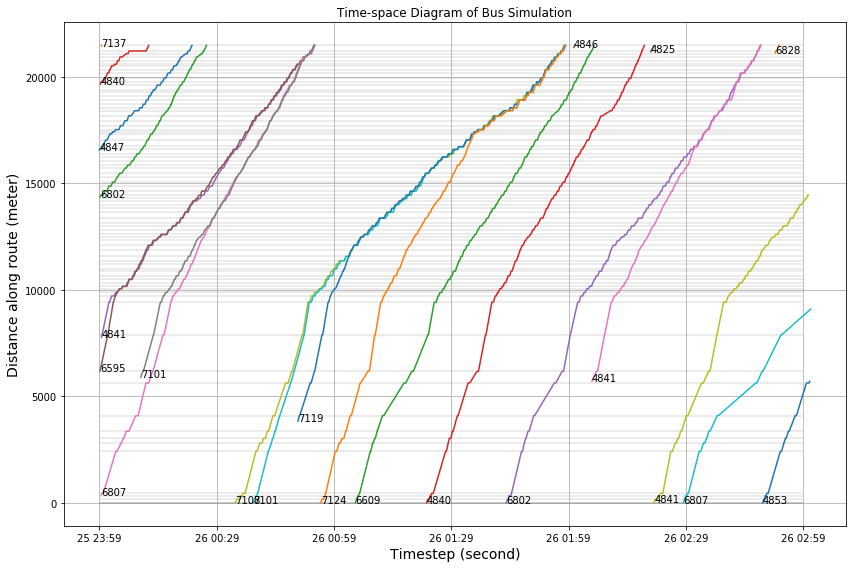

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11e8af470>)

In [4]:
# reset stops, links, and buses
stops_0, links_0, stop_pos = bsim.set_route(archive_path, direction)
infer_bus = {} # Bus objs for infer buffering only
live_bus = {} # Bus objs for streaming live
active_bus_0 = {} # SimBus objs for simulation

# infer half an hour for initial data
bsim.infer(archive_path, direction, infer_bus, stops_0, links_0, stop_pos, 30)

# run simulation without control
report_0 = bsim.simulate(archive_path, direction, live_bus, active_bus_0, stops_0, links_0, stop_pos, sim_time=time)

# plot result tsd
bsim.sim_tsd(active_bus_0, stops_0, archive_path, direction, 0, time)

# 1. Simulation with control 1: fixed holding
### Hold bus within 10-minute headway for 1 minute at each stop until relieved

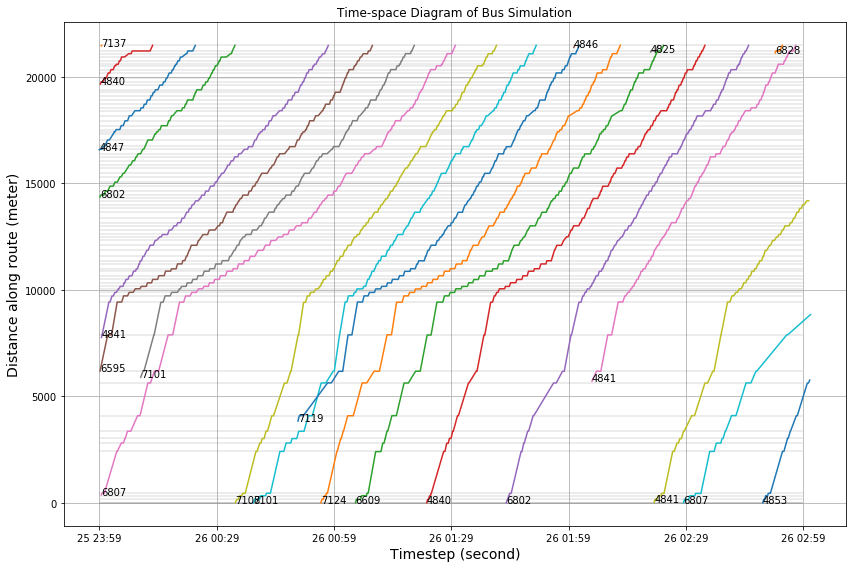

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12280f940>)

In [5]:
# reset stops, links, and buses
stops_1, links_1, stop_pos = bsim.set_route(archive_path, direction)
infer_bus = {} # Bus objs for infer buffering only
live_bus = {} # Bus objs for streaming live
active_bus_1 = {} # SimBus objs for simulation

# infer half an hour for initial data
bsim.infer(archive_path, direction, infer_bus, stops_1, links_1, stop_pos, 30)

# run simulation with control
report_1 = bsim.simulate(archive_path, direction, live_bus, active_bus_1, stops_1, links_1, stop_pos, control=1, sim_time=time)

# plot result tsd
bsim.sim_tsd(active_bus_1, stops_1, archive_path, direction, 0, time)

# 2. Simulation with control 2: naive headway
### Hold bus within 10-minute headway until fulfilled

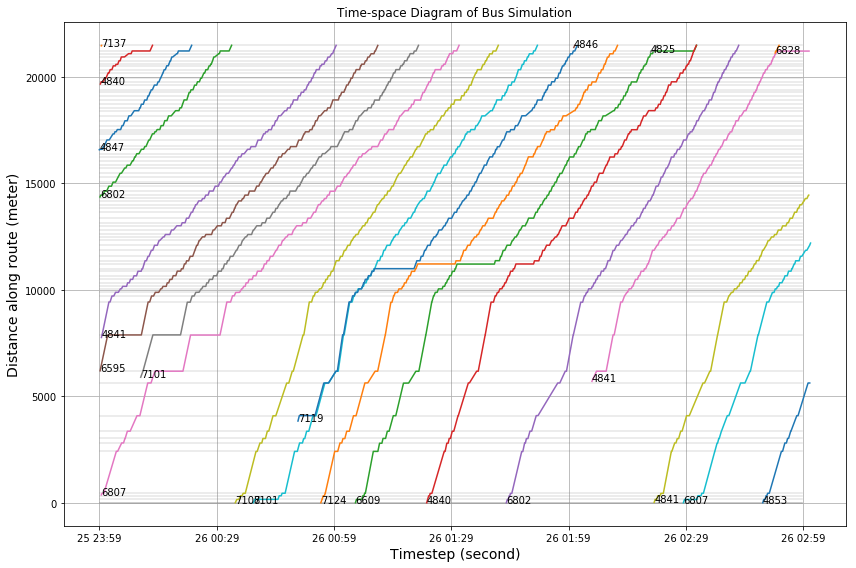

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x121724d68>)

In [6]:
# reset stops, links, and buses
stops_2, links_2, stop_pos = bsim.set_route(archive_path, direction)
infer_bus = {} # Bus objs for infer buffering only
live_bus = {} # Bus objs for streaming live
active_bus_2 = {} # SimBus objs for simulation

# infer half an hour for initial data
bsim.infer(archive_path, direction, infer_bus, stops_2, links_2, stop_pos, 30)

# run simulation with control
report_2 = bsim.simulate(archive_path, direction, live_bus, active_bus_2, stops_2, links_2, stop_pos, control=2, sim_time=time)

# plot result tsd
bsim.sim_tsd(active_bus_2, stops_2, archive_path, direction, 0, time)

# 3. Reports

In [7]:
# simulation performance
# not a very good measure, but still, the lower the better
# a temporary indicator for simulator calibration
bsim.eval_sim(archive_path, active_bus_0, direction)

MSE of simulated vehicle distance (meter) per ping pair: 1313964.60


1313964.5968160182

In [8]:
# route performance metrics across different control strategies
bsim.sim_report([report_0, report_1, report_2])

,bunch,hold,avghw,stdhw
0,15151,0.0,16.745761,14.393855
1,191,13380.0,12.528675,6.188331
2,1334,13917.0,12.632901,6.096865
